In [1]:
# 1. 파이썬 코드에서 Matplotlib 폰트 설정
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import timedelta
from itertools import combinations
from collections import Counter

# 폰트 설정
plt.rc('font', family='Malgun Gothic')
# 마이너스 부호 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False

print("한글 폰트 설정이 완료되었습니다.")

# 3. 데이터 로드 및 통합 (모든 문제 풀이의 시작점)
try:
    orders_df = pd.read_csv('../data/orders.csv')
    payments_df = pd.read_csv('../data/payments.csv')
    products_df = pd.read_csv('../data/products.csv')
    shipping_df = pd.read_csv('../data/shipping.csv')
    customers_df = pd.read_csv('../data/customers.csv')

    # 모든 데이터프레임 병합
    df = pd.merge(orders_df, payments_df, on='order_id', how='left')
    df = pd.merge(df, products_df, on='product_id', how='left')
    df = pd.merge(df, customers_df, on='customer_id', how='left')
    df = pd.merge(df, shipping_df, on='order_id', how='left')

    # 데이터 전처리
    date_cols = ['order_date', 'payment_date', 'join_date', 'shipping_start_date', 'shipping_end_date']
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    df['total_sales'] = df['quantity'] * df['price']
    
    print("데이터 로드 및 통합이 완료되었습니다.")

except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")


한글 폰트 설정이 완료되었습니다.
데이터 로드 및 통합이 완료되었습니다.


In [ ]:
# 문제 31: 시간대별 주문량 추이를 분석하여 피크 타임을 찾고, 요일별로 패턴에 차이가 있는지 확인하세요.
# 시각화: 히트맵

# 비즈니스 목적: 서버 리소스 할당, 인력 배치, 타임 세일 이벤트 기획 등 운영 최적화에 활용합니다.

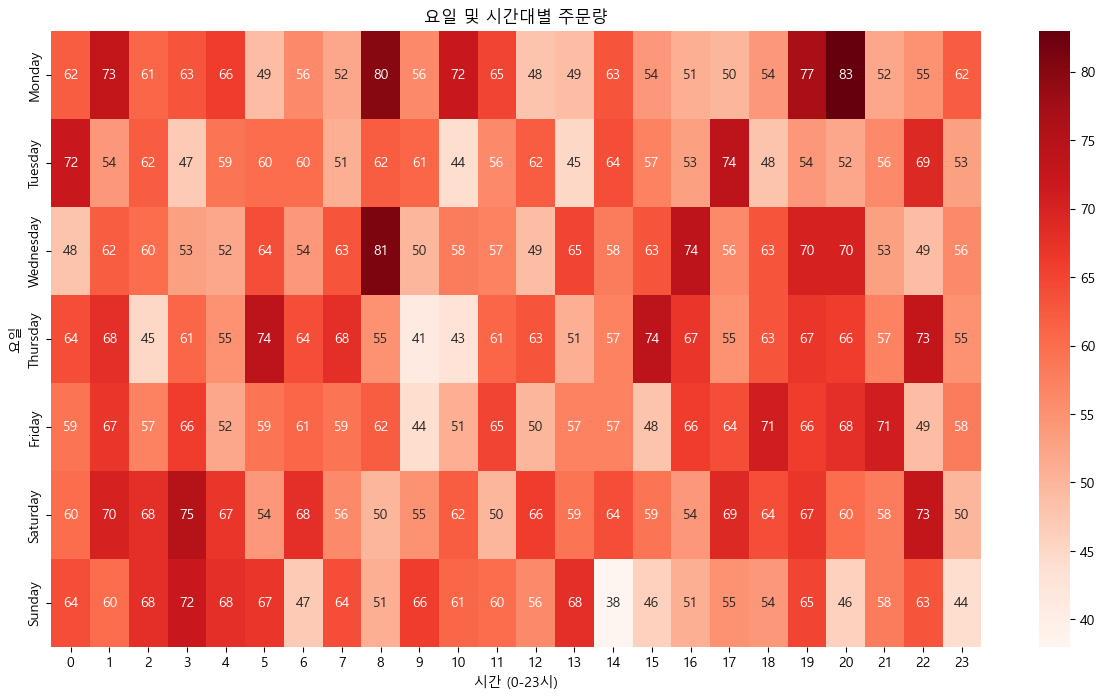

In [2]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 2: 월별 주문 건수와 평균 주문액(AOV)의 변화 추이를 함께 시각화하여 분석하세요.
# 시각화: 이중 축 차트

# 비즈니스 목적: 비즈니스의 양적 성장(주문 건수)과 질적 성장(객단가)을 동시에 파악하여, 프로모션이 단순히 주문 수만 늘렸는지 아니면 실제 매출 기여도를 높였는지 평가합니다.

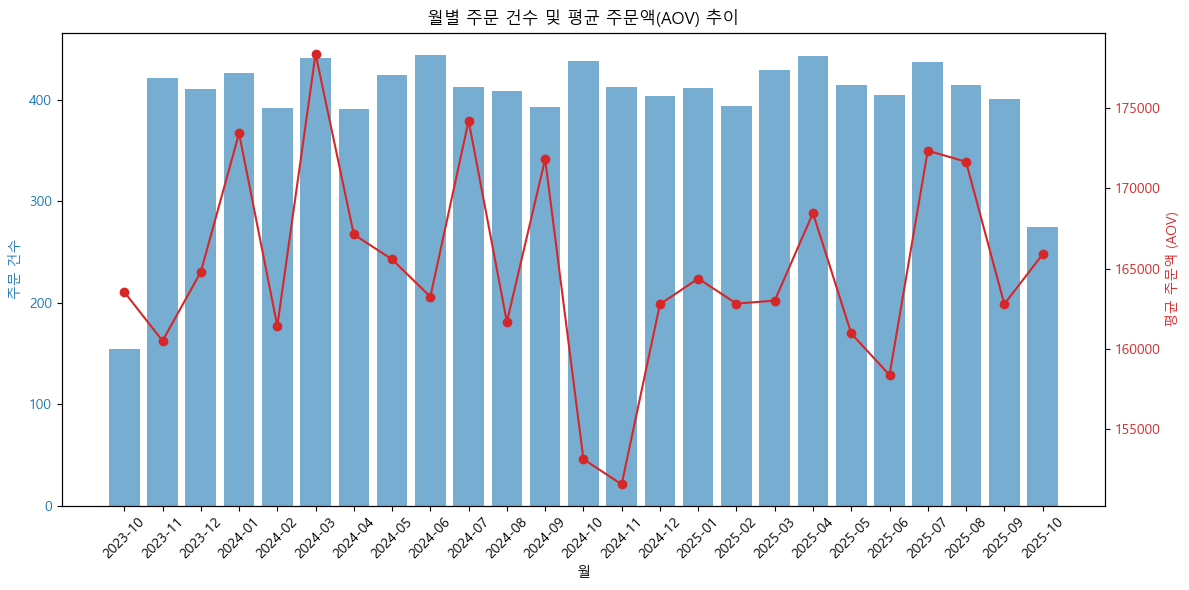

In [3]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 3: 주문 취소율(Pending 상태)이 월별로 어떻게 변화하는지 추적하세요.
# 시각화: 라인 플롯

# 비즈니스 목적: 특정 기간에 주문 취소가 급증하는지 파악하고, 해당 시점의 이벤트나 시스템 변경 등의 원인을 분석하여 문제를 개선합니다.

월별 주문 취소율 (%):
payment_status  Pending  total_orders  cancellation_rate
order_month                                             
2023-10               3           154           1.948052
2023-11              24           421           5.700713
2023-12              27           411           6.569343
2024-01              27           426           6.338028
2024-02              20           392           5.102041
2024-03              20           441           4.535147
2024-04              14           391           3.580563
2024-05              16           424           3.773585
2024-06              24           444           5.405405
2024-07              11           413           2.663438
2024-08              20           409           4.889976
2024-09              24           393           6.106870
2024-10              11           438           2.511416
2024-11              26           413           6.295400
2024-12              24           404           5.940594
2025-01         

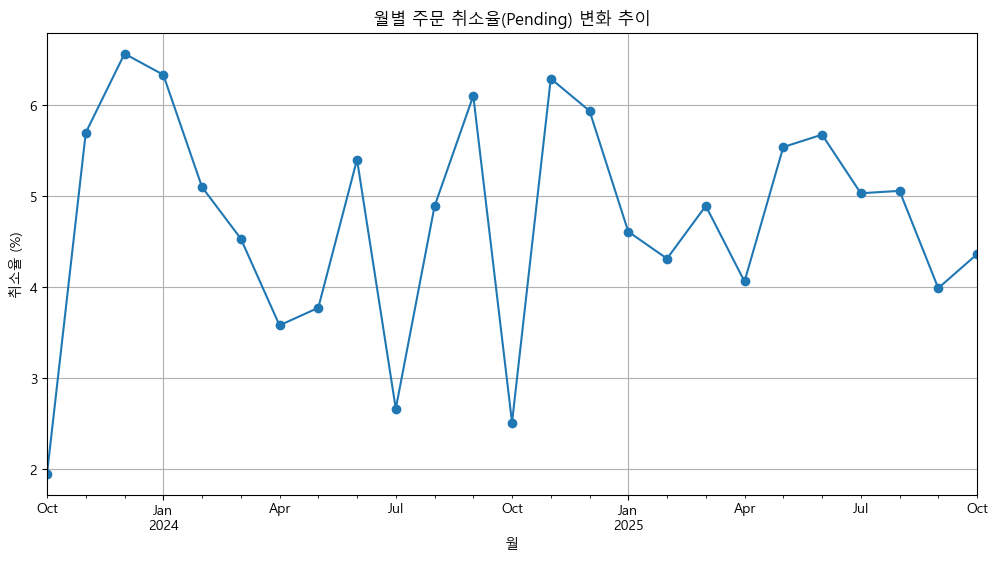

In [5]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 4: 첫 구매 고객의 주문과 재구매 고객의 주문 간 평균 주문액(AOV)을 비교하세요.
# 비즈니스 목적: 고객의 충성도가 높아질수록 구매 규모도 커지는지 확인하고, 재구매 고객 대상의 VIP 마케팅 효과를 측정합니다.

첫 구매 vs 재구매 고객 평균 주문액(AOV):
purchase_type
재구매     164512.284644
첫 구매    167092.311558
Name: total_sales, dtype: float64


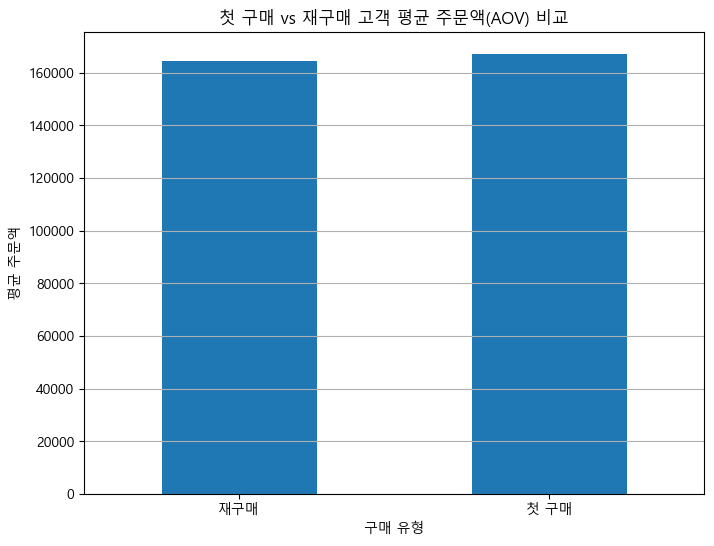

In [6]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 5: 주문량이 가장 많았던 상위 10개 날짜와 해당 요일을 찾으세요.
# 비즈니스 목적: 특별히 주문이 몰렸던 날짜를 파악하고, 해당 날짜의 이벤트, 프로모션, 사회적 이슈 등을 분석하여 향후 마케팅 전략에 반영합니다.

In [8]:
# 출력 결과를 보고 코딩하세요







주문량이 가장 많았던 상위 10일:
         date  order_count day_of_week
0  2023-12-04           29      Monday
1  2025-04-13           26      Sunday
2  2025-02-07           25      Friday
3  2025-02-18           25     Tuesday
4  2025-10-11           24    Saturday
5  2025-01-24           23      Friday
6  2024-09-07           23    Saturday
7  2025-06-12           23    Thursday
8  2025-06-08           22      Sunday
9  2025-07-04           22      Friday


In [ ]:
# 문제 6: 첫 구매 후 30일 이내에 재구매한 고객의 비율(단기 리텐션)을 계산하세요.
# 비즈니스 목적: 신규 고객이 얼마나 빠르게 우리 서비스에 안착하는지 측정하는 핵심 지표로, 온보딩 프로세스의 성공 여부를 판단하는 데 사용됩니다.

In [11]:
# 출력 결과를 보고 코딩하세요







첫 구매 후 30일 이내 재구매 고객 비율: 20.10%


In [ ]:
# 문제 7: 주문량이 상위 10%인 날짜들은 주로 어떤 요일에 분포하는지 분석하세요.
# 비즈니스 목적: '대박 나는 날'의 공통적인 요일 패턴을 파악하고, 
# 해당 요일에 더 많은 마케팅 리소스를 집중하거나 서버 증설을 준비하는 등의 전략을 수립합니다.

주문량 상위 10%인 날들의 요일 분포:
order_date
Friday       16.216216
Saturday     16.216216
Sunday       15.315315
Monday       15.315315
Thursday     12.612613
Wednesday    12.612613
Tuesday      11.711712
Name: proportion, dtype: float64


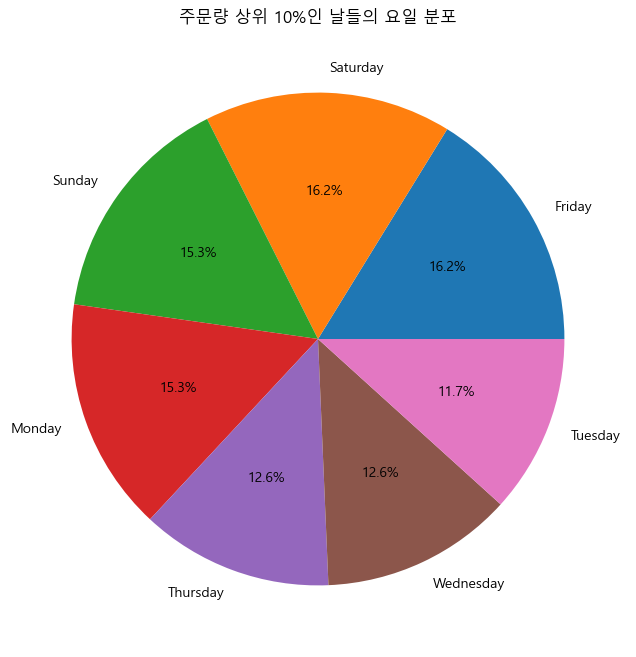

In [13]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 8: 고객의 누적 주문 횟수에 따라 평균 주문액이 어떻게 변화하는지 분석하세요.
# 시각화: 라인 플롯

# 비즈니스 목적: 고객이 재구매를 반복할수록 더 비싼 상품을 구매하는 경향(충성도 상승)이 있는지, 아니면 오히려 할인 쿠폰에 익숙해져 더 저렴한 상품을 구매하는지(체리피킹) 파악합니다.

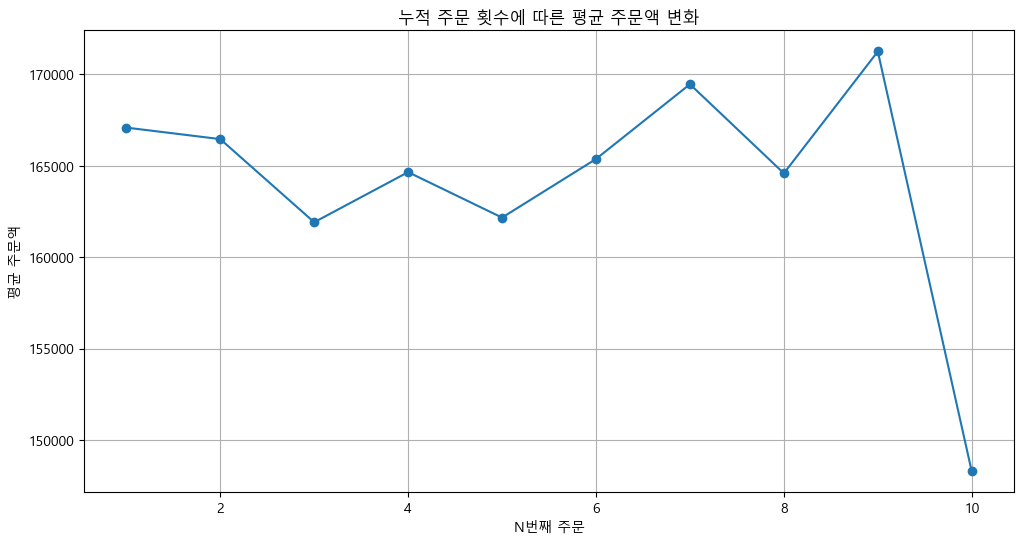

In [14]:
# 출력 결과를 보고 코딩하세요







In [ ]:
# 문제 9: 주문이 가장 드문 시간대 Top 3를 찾아 서버 점검이나 업데이트 시간으로 추천하세요.
# 비즈니스 목적: 서비스 중단으로 인한 영향을 최소화할 수 있는 최적의 시스템 점검 시간을 데이터 기반으로 결정합니다.

In [15]:
# 출력 결과를 보고 코딩하세요







주문이 가장 드문 시간대 Top 3 (서버 점검 추천 시간):
order_date
9     373
23    378
10    391
Name: order_id, dtype: int64
